# import the libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [146]:
df=pd.read_csv('heart_csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


# EDA process

In [147]:
#checking the shape of data
df.shape

(303, 14)

In [148]:
#checking the columns of the data
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [149]:
#checking the uniquw values
df['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [150]:
#checking the value counts
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [151]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [152]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

In [153]:
#checking the null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

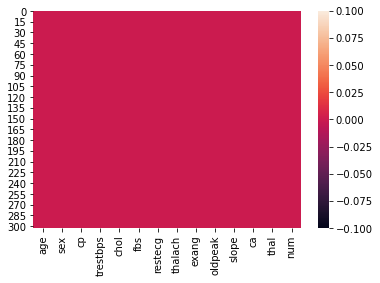

In [154]:
#using heatmap for better represetation of the null values 
sns.heatmap(df.isnull())

In [155]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

#  checking the Correlation 

In [156]:
dfcor=df.corr()
dfcor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


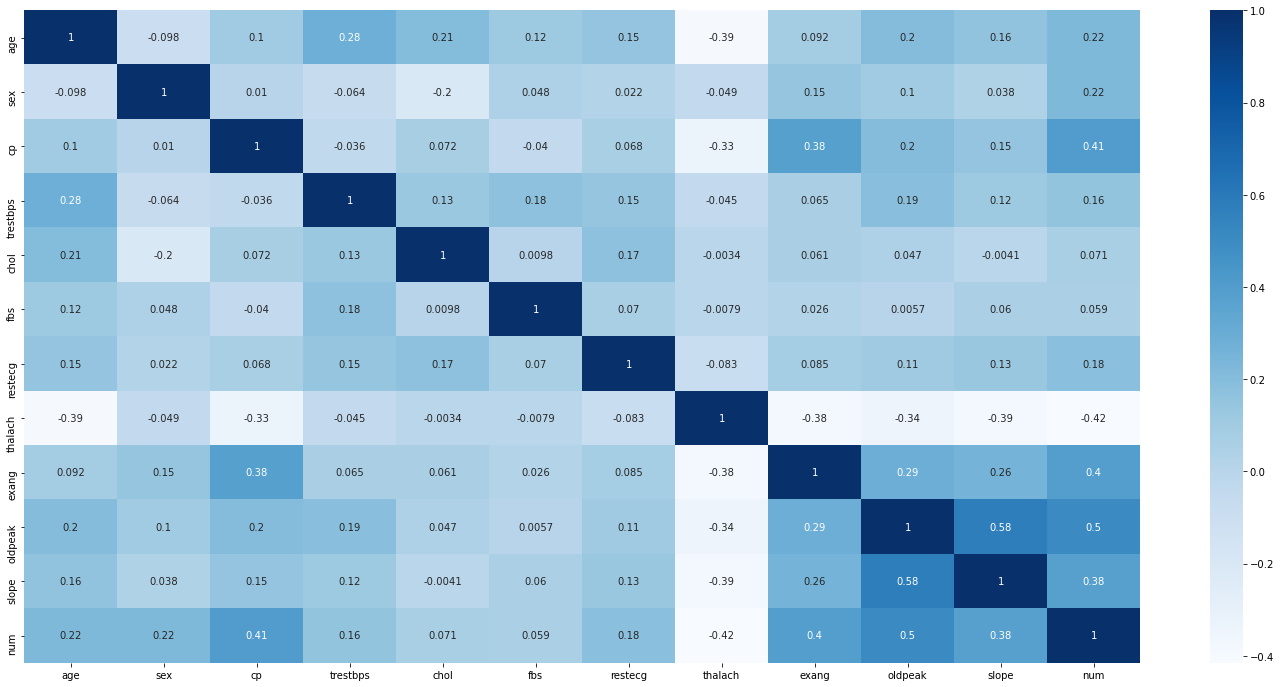

In [157]:
#we will be using heatmap for better representation of the correlations
plt.figure(figsize=(25,12))
sns.heatmap(dfcor,cmap='Blues', annot = True)



In [158]:
#describing the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


# visualizations

# univariate analysis

In [159]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [160]:
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

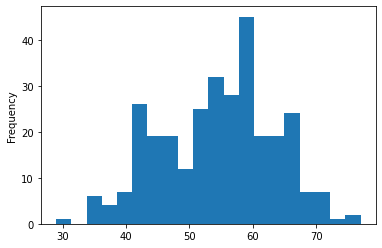

58.0    19
57.0    17
54.0    16
59.0    14
52.0    13
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
41.0    10
64.0    10
67.0     9
63.0     9
42.0     8
43.0     8
53.0     8
65.0     8
55.0     8
61.0     8
45.0     8
46.0     7
66.0     7
50.0     7
48.0     7
47.0     5
49.0     5
39.0     4
68.0     4
35.0     4
70.0     4
69.0     3
40.0     3
71.0     3
34.0     2
37.0     2
38.0     2
74.0     1
29.0     1
77.0     1
76.0     1
Name: age, dtype: int64

In [161]:
df['age'].plot.hist(bins=20)
plt.show()

df['age'].value_counts()

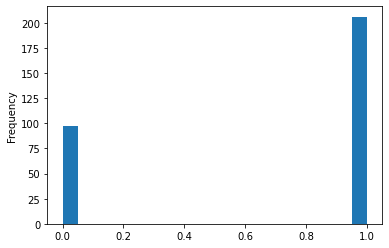

1.0    206
0.0     97
Name: sex, dtype: int64

In [162]:
df['sex'].plot.hist(bins=20)
plt.show()
df['sex'].value_counts()

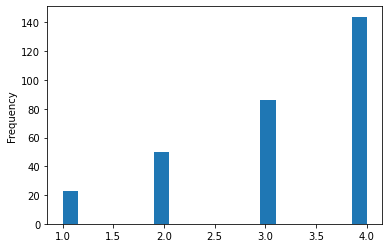

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

In [163]:
df['cp'].plot.hist(bins=20)
plt.show()
df['cp'].value_counts()

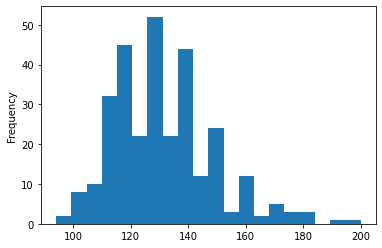

120.0    37
130.0    36
140.0    32
110.0    19
150.0    17
138.0    12
128.0    12
125.0    11
160.0    11
112.0     9
132.0     8
118.0     7
124.0     6
135.0     6
108.0     6
152.0     5
134.0     5
145.0     5
100.0     4
170.0     4
122.0     4
136.0     3
105.0     3
115.0     3
142.0     3
126.0     3
180.0     3
178.0     2
94.0      2
148.0     2
146.0     2
102.0     2
144.0     2
172.0     1
117.0     1
106.0     1
156.0     1
123.0     1
154.0     1
200.0     1
129.0     1
192.0     1
158.0     1
174.0     1
155.0     1
104.0     1
101.0     1
114.0     1
165.0     1
164.0     1
Name: trestbps, dtype: int64

In [164]:
df['trestbps'].plot.hist(bins=20)
plt.show()
df['trestbps'].value_counts()

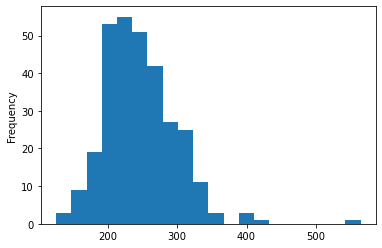

234.0    6
204.0    6
197.0    6
269.0    5
212.0    5
        ..
360.0    1
237.0    1
178.0    1
306.0    1
311.0    1
Name: chol, Length: 152, dtype: int64

In [165]:
df['chol'].plot.hist(bins=20)
plt.show()
df['chol'].value_counts()

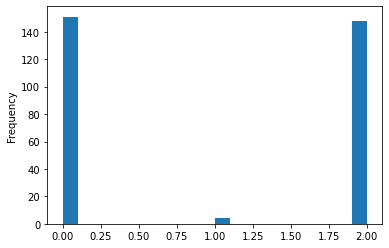

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

In [166]:
df['restecg'].plot.hist(bins=20)
plt.show()
df['restecg'].value_counts()

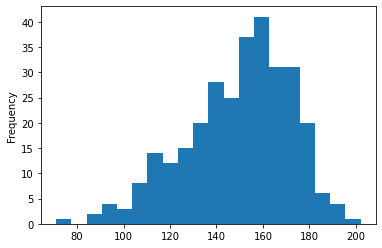

162.0    11
160.0     9
163.0     9
152.0     8
150.0     7
         ..
134.0     1
177.0     1
128.0     1
99.0      1
90.0      1
Name: thalach, Length: 91, dtype: int64

In [167]:
df['thalach'].plot.hist(bins=20)
plt.show()
df['thalach'].value_counts()

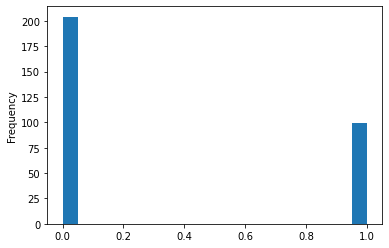

0.0    204
1.0     99
Name: exang, dtype: int64

In [168]:
df['exang'].plot.hist(bins=20)
plt.show()
df['exang'].value_counts()

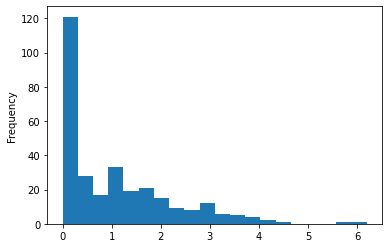

0.0    99
1.2    17
1.0    14
0.6    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.8     6
2.6     6
0.5     5
3.0     5
1.5     5
1.9     5
2.2     4
3.6     4
3.4     3
0.3     3
2.4     3
0.9     3
4.0     3
4.2     2
2.3     2
3.2     2
2.5     2
1.1     2
3.5     1
1.3     1
5.6     1
0.7     1
2.9     1
3.1     1
3.8     1
2.1     1
6.2     1
4.4     1
Name: oldpeak, dtype: int64

In [169]:
df['oldpeak'].plot.hist(bins=20)
plt.show()
df['oldpeak'].value_counts()

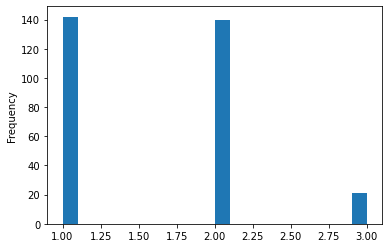

1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64

In [170]:
df['slope'].plot.hist(bins=20)
plt.show()
df['slope'].value_counts()

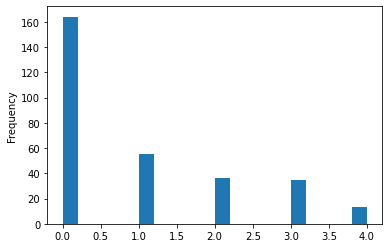

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [171]:
df['num'].plot.hist(bins=20)
plt.show()
df['num'].value_counts()

bivariate analysis

In [172]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

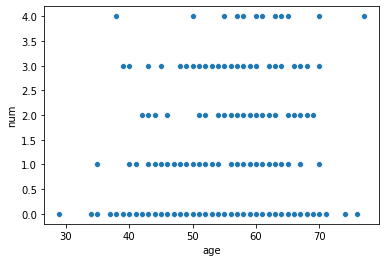

In [173]:
sns.scatterplot(x='age',y='num',data=df)


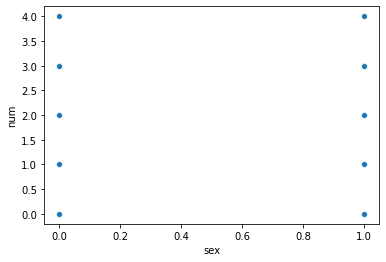

In [174]:
sns.scatterplot(x='sex',y='num',data=df)


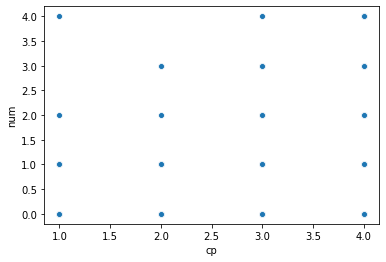

In [175]:
sns.scatterplot(x='cp',y='num',data=df)


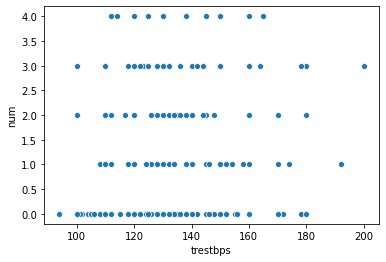

In [176]:
sns.scatterplot(x='trestbps',y='num',data=df)


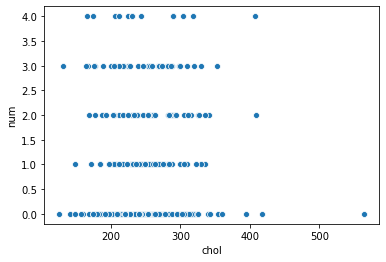

In [177]:
sns.scatterplot(x='chol',y='num',data=df)


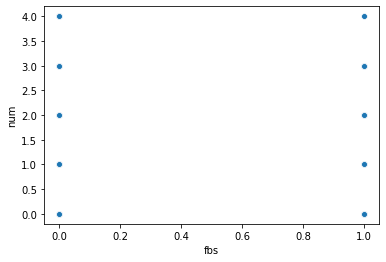

In [178]:
sns.scatterplot(x='fbs',y='num',data=df)


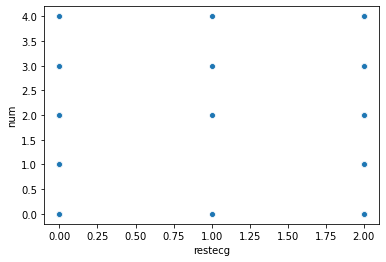

In [179]:
sns.scatterplot(x='restecg',y='num',data=df)


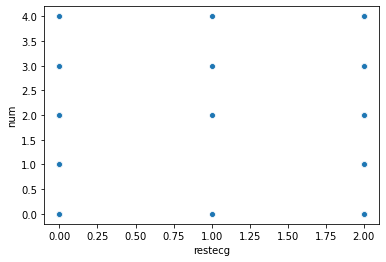

In [180]:
sns.scatterplot(x='restecg',y='num',data=df)


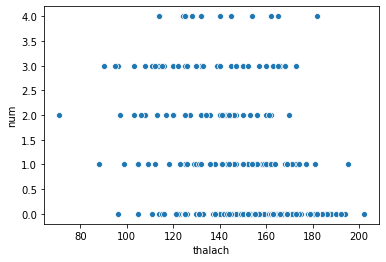

In [181]:
sns.scatterplot(x='thalach',y='num',data=df)


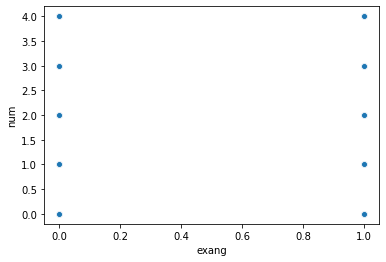

In [182]:
sns.scatterplot(x='exang',y='num',data=df)


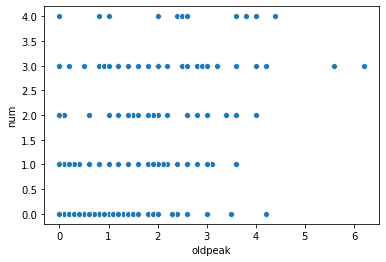

In [183]:
sns.scatterplot(x='oldpeak',y='num',data=df)


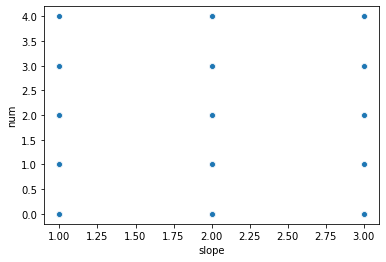

In [184]:
sns.scatterplot(x='slope',y='num',data=df)


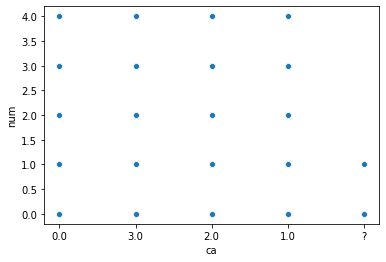

In [185]:
sns.scatterplot(x='ca',y='num',data=df)


# checking for outliers

In [186]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

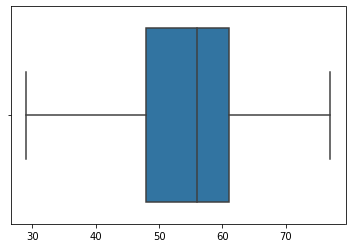

In [187]:
sns.boxplot(['age'], data=df)

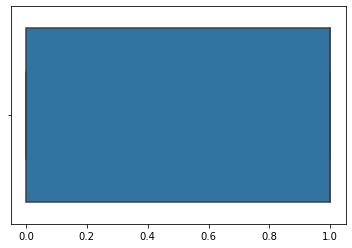

In [188]:
sns.boxplot(['sex'], data=df)

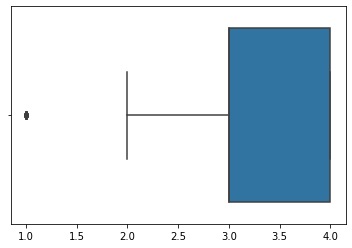

In [189]:
sns.boxplot(['cp'], data=df)

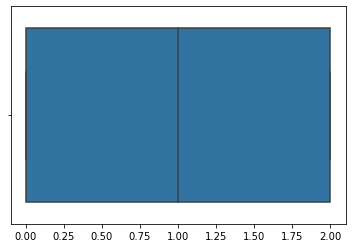

In [190]:
sns.boxplot(['restecg'], data=df)

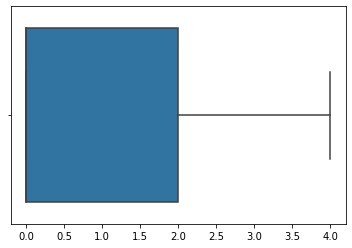

In [191]:
sns.boxplot(['num'], data=df)

# label encoding

In [192]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [195]:
#trasnforming the non numerical data into numerical
from sklearn.preprocessing import LabelEncoder

In [205]:
le=LabelEncoder()

list1=['ca','thal']
for val in list1:
    df[val]=le.fit_transform(df[val])

In [206]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca            int32
thal          int32
num           int64
dtype: object

In [207]:
collist=df.columns.values
ncol=12
nrows=10

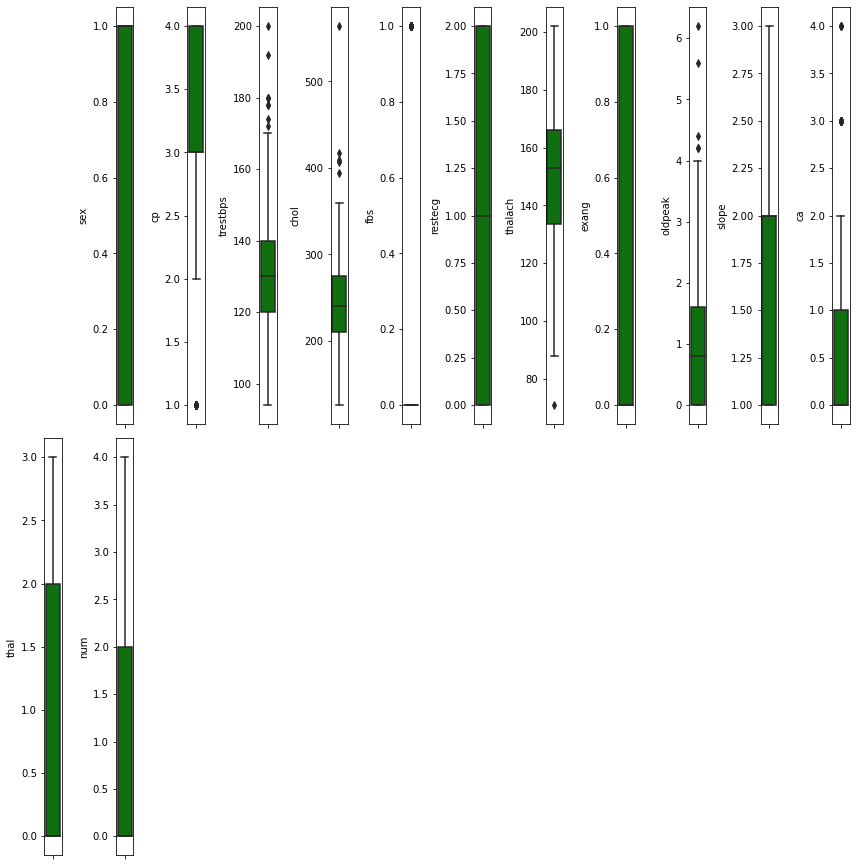

In [208]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
           plt.subplot(nrows,ncol,i+1)
           sns.boxplot(df[collist[i]],color='green',orient='v')
           plt.tight_layout()

# treating outliers

In [240]:
#using z-score method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [241]:
df.shape

(303, 14)

In [242]:
df_new.shape

(290, 14)

# skewness

In [243]:
#checking if there is any skewness
df.skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.300488
thal        0.345446
num         1.058496
dtype: float64

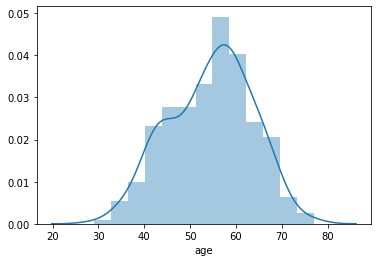

In [244]:
sns.distplot(df['age'])
plt.show()

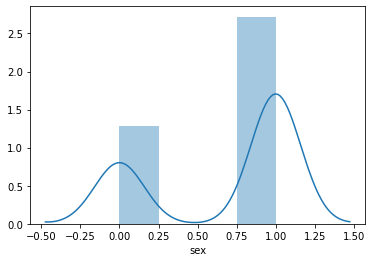

In [245]:
sns.distplot(df['sex'])
plt.show()

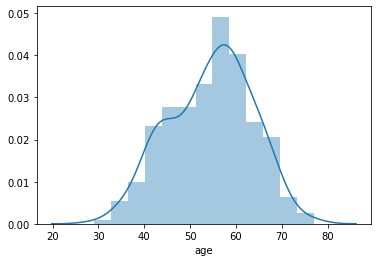

In [246]:
sns.distplot(df['age'])
plt.show()

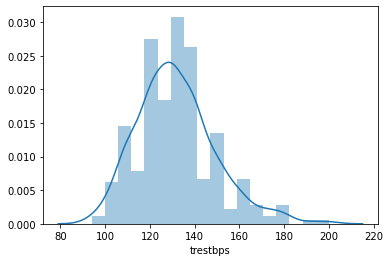

In [247]:
sns.distplot(df['trestbps'])
plt.show()

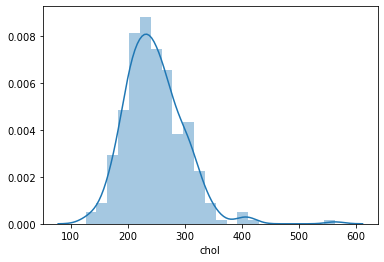

In [248]:
sns.distplot(df['chol'])
plt.show()

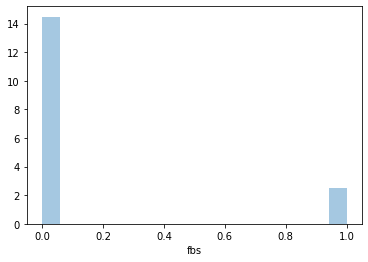

In [249]:
sns.distplot(df['fbs'])
plt.show()

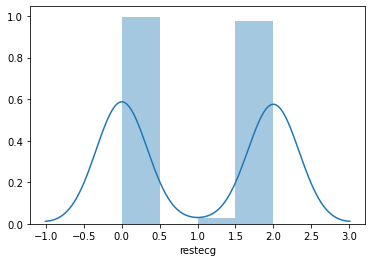

In [250]:
sns.distplot(df['restecg'])
plt.show()

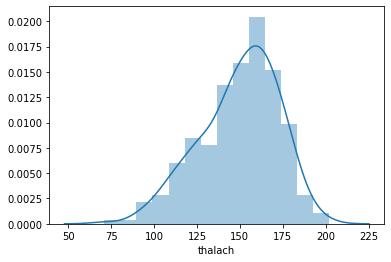

In [251]:
sns.distplot(df['thalach'])
plt.show()

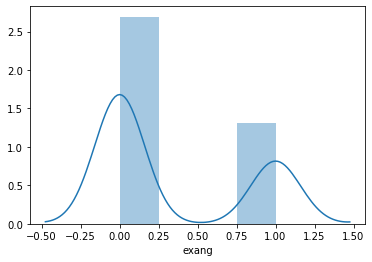

In [252]:
sns.distplot(df['exang'])
plt.show()

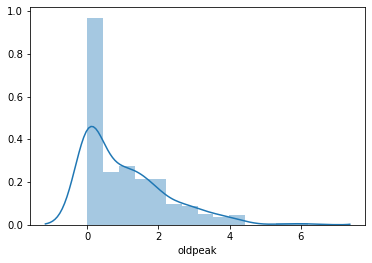

In [253]:
sns.distplot(df['oldpeak'])
plt.show()

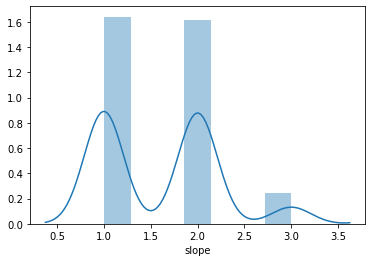

In [254]:
sns.distplot(df['slope'])
plt.show()

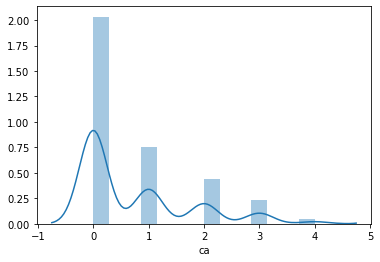

In [255]:
sns.distplot(df['ca'])
plt.show()

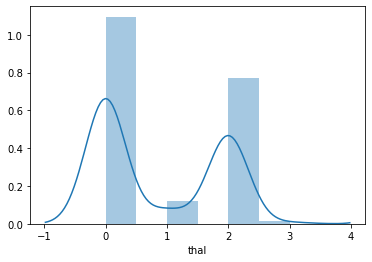

In [256]:
sns.distplot(df['thal'])
plt.show()

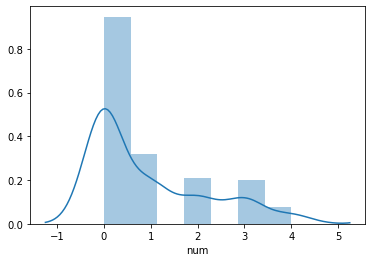

In [257]:
sns.distplot(df['num'])
plt.show()

In [258]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [259]:
x.shape

(303, 13)

In [260]:
y.shape

(303,)

# scaling the data

In [261]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [262]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0,2
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1,2
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1,0


In [263]:
y.values

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3,
       1, 1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4,
       3, 1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1,
       0, 1, 0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 1, 2, 0, 3, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0,
       4, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4,
       2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3,

In [300]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)

# Building model

In [301]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [302]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))



0.618421052631579
[[38  4  1  0  0]
 [ 7  5  2  1  0]
 [ 1  1  3  1  0]
 [ 0  2  4  1  1]
 [ 0  2  0  2  0]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.36      0.33      0.34        15
           2       0.30      0.50      0.37         6
           3       0.20      0.12      0.15         8
           4       0.00      0.00      0.00         4

    accuracy                           0.62        76
   macro avg       0.34      0.37      0.35        76
weighted avg       0.58      0.62      0.60        76



In [303]:
#k=10
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))


0.5657894736842105
[[40  2  0  1  0]
 [13  2  0  0  0]
 [ 1  2  1  2  0]
 [ 4  3  1  0  0]
 [ 3  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.66      0.93      0.77        43
           1       0.20      0.13      0.16        15
           2       0.50      0.17      0.25         6
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.57        76
   macro avg       0.27      0.25      0.24        76
weighted avg       0.45      0.57      0.49        76



In [304]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.5657894736842105
[[43  0  0  0  0]
 [15  0  0  0  0]
 [ 6  0  0  0  0]
 [ 8  0  0  0  0]
 [ 4  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        43
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.57        76
   macro avg       0.11      0.20      0.14        76
weighted avg       0.32      0.57      0.41        76



In [305]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.5657894736842105
[[43  0  0  0  0]
 [15  0  0  0  0]
 [ 6  0  0  0  0]
 [ 8  0  0  0  0]
 [ 4  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        43
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.57        76
   macro avg       0.11      0.20      0.14        76
weighted avg       0.32      0.57      0.41        76



In [306]:
#using the random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 45)
forest.fit(x_train, y_train)
forest.score(x_train, y_train)
predforest=forest.predict(x_test)
print(accuracy_score(y_test,predforest))
print(confusion_matrix(y_test,predforest))
print(classification_report(y_test,predforest))

0.5921052631578947
[[41  2  0  0  0]
 [10  2  1  2  0]
 [ 2  2  2  0  0]
 [ 2  2  3  0  1]
 [ 1  1  1  1  0]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        43
           1       0.22      0.13      0.17        15
           2       0.29      0.33      0.31         6
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.59        76
   macro avg       0.25      0.28      0.26        76
weighted avg       0.48      0.59      0.53        76



In [307]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.6052631578947368
[[36  3  3  1  0]
 [ 9  5  0  1  0]
 [ 0  2  3  1  0]
 [ 0  2  4  1  1]
 [ 0  2  1  0  1]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        43
           1       0.36      0.33      0.34        15
           2       0.27      0.50      0.35         6
           3       0.25      0.12      0.17         8
           4       0.50      0.25      0.33         4

    accuracy                           0.61        76
   macro avg       0.44      0.41      0.40        76
weighted avg       0.60      0.61      0.59        76



# Saving the best model\

In [332]:
import joblib

In [333]:
#saving the model as a object file

joblib.dump(forest, 'mnbfile.obj')
#load the model from the file

mnb_from_joblib=joblib.load('mnbfile.obj')

#using the loaded model to make predictions

mnb_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 1, 0, 0, 0, 3, 1, 0, 3, 1, 4, 2, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

In [334]:
#saving the predicted values
df_new=pd.DataFrame(predmnb)
df_new.to_csv('mnb_prediction.csv')